### Mudstone classification based on Pires de Lima et al, 2021)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


### Quantity of images

In [2]:
ls = ["AMdst", "BMdst", "MCcSt", "MCSt"]
for i in ls:    
    print(len(os.listdir(i)))

<IPython.core.display.Javascript object>

83


<IPython.core.display.Javascript object>

154


<IPython.core.display.Javascript object>

124


<IPython.core.display.Javascript object>

152


In [3]:
batch_size = 40

In [4]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('AMdst/sample_15_10X_PP_2.jpg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

<class 'numpy.ndarray'>
(484, 646, 3)


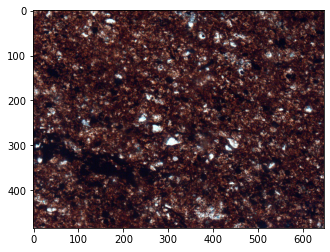

In [5]:
plt.imshow(image)

In [6]:
dct = {"AMdst":0, "BMdst":1, "MCcSt":2, "MCSt":3}

## Save Images as np.arrays

In [7]:
from tqdm import tqdm

imgs = []
labels = []
for k,v in tqdm(dct.items()):
    for i in os.listdir(k):
        image = Image.open(k+'/'+i)
        # convert image to numpy array
        data = asarray(image)
        imgs.append(data)
        labels.append(v)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

 25%|█████████████████████                                                               | 1/4 [00:00<00:01,  1.95it/s]

<IPython.core.display.Javascript object>

 50%|██████████████████████████████████████████                                          | 2/4 [00:01<00:01,  1.28it/s]

<IPython.core.display.Javascript object>

 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:02<00:00,  1.28it/s]

<IPython.core.display.Javascript object>

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.24it/s]


In [8]:
imgs[0]

array([[[  3,  11,  34],
        [ 18,   5,  23],
        [ 46,  14,  25],
        ...,
        [ 65,  30,  36],
        [ 62,  26,  26],
        [ 62,  25,  19]],

       [[ 27,  27,  35],
        [ 30,  17,  27],
        [ 54,  30,  43],
        ...,
        [ 38,   5,  16],
        [ 60,  25,  32],
        [ 67,  31,  31]],

       [[ 91,  77,  64],
        [ 48,  30,  28],
        [ 31,  11,  22],
        ...,
        [ 36,   5,  21],
        [ 39,   7,  20],
        [ 69,  36,  43]],

       ...,

       [[ 62,  35,  44],
        [ 75,  32,  42],
        [ 58,  12,  23],
        ...,
        [110,  70,  62],
        [ 78,  49,  51],
        [ 51,  34,  44]],

       [[ 98,  58,  66],
        [ 76,  26,  35],
        [ 65,  14,  23],
        ...,
        [117,  68,  61],
        [113,  77,  81],
        [ 61,  33,  45]],

       [[112,  70,  72],
        [ 94,  48,  50],
        [ 68,  19,  22],
        ...,
        [109,  57,  59],
        [ 54,  16,  31],
        [ 51,  19,  40]]

In [9]:
np_imgs = np.array(imgs)

In [10]:
np_labels = np.array(labels)

In [11]:
np.save("imgs.npy", np_imgs)
np.save("labels.npy", np_labels)

In [12]:
np_imgs.shape

(513, 484, 646, 3)

In [13]:
np_labels.shape

(513,)

In [14]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [15]:
imgs_final, labels_final = unison_shuffled_copies(np_imgs, np_labels)

In [16]:
total = len(imgs_final)

In [17]:
partition_80_20 = int(total*0.8)

In [18]:
train_imgs, train_labels = imgs_final[:partition_80_20], labels_final[:partition_80_20]
test_imgs, test_labels = imgs_final[partition_80_20:], labels_final[partition_80_20:]

In [19]:
np.save("train_imgs.npy", train_imgs)
np.save("train_labels.npy", train_labels)
np.save("test_imgs.npy", test_imgs)
np.save("test_labels.npy", test_labels)